<a href="https://colab.research.google.com/github/donggood-527/DG-PR/blob/main/%EC%9D%B4%EA%B2%83%EC%9D%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EC%9D%B4%EB%8B%A4_Ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 멕시코풍 프랜차이즈 Chipotle의 주문 데이터 분석하기.**

<STEP 1 탐색> : 데이터의 기초 정보 

In [43]:
import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
chipo = pd.read_csv('./chipotle.tsv', sep = '\t')

print(chipo.shape) #행과 열 크기 출력
print("------------------------------------")
print(chipo.info()) # 행과 열 구성 정보

# object 타입은 문자열을 의미한다. null은 결측값이다
# 0 to 4621 로 4622개로 구성되어있고, 3번행렬은 3376으로 1246개 결측값이 있다

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [65]:
# chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
chipo.head(100)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
95,42,1,Barbacoa Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25
96,42,1,Chips and Guacamole,NaN,4.45
97,43,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.75
98,43,1,Chicken Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75


In [45]:
print(chipo.columns) # 컬럼 출력
print("------------------------------------")
print(chipo.index) # 자

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------
RangeIndex(start=0, stop=4622, step=1)


In [46]:
chipo['order_id'] = chipo['order_id'].astype(str)
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환합니다.
print(chipo.describe())
# chipo dataframe에서 수치형 피처들의 요약 통계량을 확인합니다.

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [47]:
print(len(chipo['order_id'].unique())) # order_id의 개수를 출력합니다.
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력합니다.

1834
50


<STEP 2 인사이트의 발견> : 탐색과 시각화



In [48]:
# 가장 많이 주문한 item : top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:20]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)
# enumerate = 리스트 형식 값 출력 (데이터.iteritems():키밸류 , 시작)
# len = len(s)은 입력값 s의 길이(요소의 전체 개수)를 리턴하는 함수
# range = 입력받은 숫자에 해당되는 범위의 값을 반복 가능한 객체로 만들어 리턴한다

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110
Top 11 : Chips and Fresh Tomato Salsa 110
Top 12 : Canned Soda 104
Top 13 : Side of Chips 101
Top 14 : Veggie Burrito 95
Top 15 : Barbacoa Burrito 91
Top 16 : Veggie Bowl 85
Top 17 : Carnitas Bowl 68
Top 18 : Barbacoa Bowl 66
Top 19 : Carnitas Burrito 59
Top 20 : Steak Soft Tacos 55


In [49]:
chipo['item_name'].value_counts().index.tolist()[0]
# value_count 한 값 index.tolist의 0번째 즉 가장 많이 팔린 아이템 이름

'Chicken Bowl'

In [50]:
# item당 주문 개수를 출력합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # item당 주문 개수를 출력합니다.

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [51]:
# item당 주문 개수를 출력합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # item당 주문 개수를 출력합니다.

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [52]:
# item당 주문 총량을 출력합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # item당 주문 총량을 출력합니다.

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

시각화

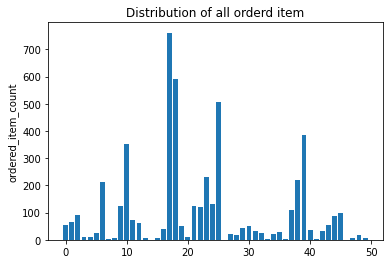

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist() # item_quantity 인덱스를 tolist를 이용하여 설정
x_pos = np.arange(len(item_name_list)) # item_name_list를 len함수를 이용하여 갯수를 셈
order_cnt = item_quantity.values.tolist() # 각 item_quantity의 값을 tolist 이용하여 설정
 
plt.bar(x_pos, order_cnt, align='center') # x ,y, 기준점 설정
plt.ylabel('ordered_item_count') # y 레이블 이름
plt.title('Distribution of all orderd item') # 타이틀 제목
 
plt.show() # 표 출력

<STEP 3> 데이터 전처리

In [54]:
print(chipo.info())
print('-------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [55]:
# column 단위 데이터에 apply 함수로 전처리를 적용합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
# lambda <매개변수1>, <매개변수2>... : 매개변수를 이용한 식
chipo.describe() # describe() 통계량

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [60]:
# lambda 함수

x = lambda x,y,z: x+y+z 

x(1,2,3)

6

<STEP 4> 탐색적 분석

In [61]:
chipo.groupby('order_id')['item_price'].sum().mean()
# groupby 함수를 이용해 order id 별 item price 를 sum()합치고 mean() 평균을 낸다 

18.811428571428717

In [79]:
# 한 주문에 10달러 이상 사용한 id를 출력합니다.
chipo_orderid_group = chipo.groupby('order_id').sum() # odder_id 별로 값을 합친다
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10] # 그룹화 된거에서 가격이 10이상 인것만 한번 더 필터링

print(results[:10]) 
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [80]:
# 각 아이템의 가격을 계산합니다.
chipo_one_item = chipo[chipo.quantity == 1] # 주문 수량이 1개인것만 추출합니다
price_per_item = chipo_one_item.groupby('item_name').min() # 추출된 데이터를 아이템 이름 별로 그룹바이 한후 평균을 냅니다.
price_per_item.sort_values(by = "item_price", ascending = False)[:10] # 평균 값을 sort_values()로 정렬 ascending= false
                                                                      # 로 내림차순으로 설정합니다.


,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


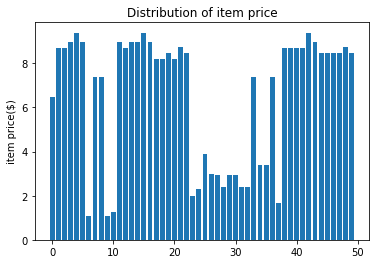

In [81]:
# 아이템 가격 분포 그래프를 출력합니다.
item_name_list = price_per_item.index.tolist() 
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

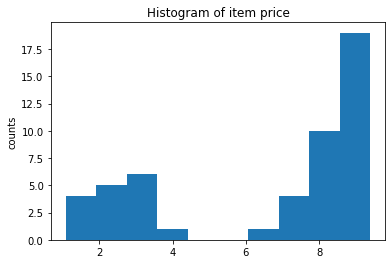

In [82]:
# 아이템 가격 히스토그램을 출력합니다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

In [92]:
# 가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
1014,2,10.08
730,2,10.08
14,2,10.08


In [110]:
# veggie salad bowl 이 몇 번 주문되었는지 구하기

aa = chipo.groupby('item_name')['quantity'].sum()
aa['Veggie Salad Bowl']

18

In [136]:
### [“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기]
chipo_c = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_ca = chipo_c[chipo_c['quantity'] >= 2]
len(chipo_ca)

33

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
654,271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
976,401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1017,418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",17.50
1106,457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50
